# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## Step 1. 문제 정의 및 가설 설정하기


- 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악

    - 어떤 행동 패턴이 서비스 구독 연장에 영향을 미치는가?   
    - 유저들의 학습 습관, 선호도, 이용 행태는 어떻게 구독 결정에 영향을 미치는가?   
   
- 가설 설정   

    1. 사용자가 학습 플랫폼을 많이 이용할수록 구독을 연장할 가능성이 높다.
         - 월간 활동적인 학습 일수, 완료한 총 코스 수, 평균 학습 세션 시간 등이 높을수록 구독 연장 확률이 높다.

    2. 커뮤니티 참여도가 높을수록 구독을 연장할 가능성이 높다.

    3. 결제 패턴이 규칙적일수록 구독을 연장할 가능성이 높다.
        -  지난 3개월 동안 결제 패턴이 규칙적이고, 결제가 잘 이루어진 사용자가 구독을 연장할 가능성이 높다. 


## Step 2. 데이터 분석 기본 세팅 하기

### 2.1. DATA 분석 기본 세팅
    - 1. 데이터 불러오기
    - 2. 데이터 확인
    - 3. 데이터 기본 정보 확인
    - 4. 데이터 통계 요약 확인

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import folium
from folium.plugins import MarkerCluster

In [7]:
# 데이터 로드
access_data = pd.read_csv('data/mini.csv',sep=',')

In [10]:
# 데이터 확인
access_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [266]:
# 결측치, Datatype 확인
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [284]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [53]:
# 데이터 확인 , 기술통계 확인, 변수명 길어서 행열 전환
access_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,10000,10000,b919c29d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_duration,10000.0,NaN,NaN,NaN,11.8974,6.600896,1.0,6.0,12.0,18.0,23.0
recent_login_time,10000.0,NaN,NaN,NaN,15.0132,8.362573,1.0,8.0,15.0,22.0,29.0
average_login_time,10000.0,NaN,NaN,NaN,14.994076,3.001869,2.366189,13.025597,14.979228,16.99534,26.99849
average_time_per_learning_session,10000.0,NaN,NaN,NaN,54.91772,56.02431,0.011515,15.276611,37.578818,75.5842,503.372616
monthly_active_learning_days,10000.0,NaN,NaN,NaN,12.5454,6.932239,1.0,7.0,13.0,19.0,24.0
total_completed_courses,10000.0,NaN,NaN,NaN,12.2275,3.634125,1.0,10.0,12.0,15.0,27.0
recent_learning_achievement,10000.0,NaN,NaN,NaN,75.029513,9.968529,35.941755,68.278054,75.126061,81.718976,112.643828
abandoned_learning_sessions,10000.0,NaN,NaN,NaN,3.0436,1.755052,0.0,2.0,3.0,4.0,12.0
community_engagement_level,10000.0,NaN,NaN,NaN,3.8861,1.262175,1.0,3.0,4.0,5.0,5.0


In [240]:
# 타겟 변수 분리
target_1_data = access_data[access_data['target'] == 1]
target_0_data = access_data[access_data['target'] == 0]

# 스케일링
scaler = StandardScaler()
X = access_data.drop(columns=['target'])
X_scaled = scaler.fit_transform(X)
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled['target'] = data['target']

ValueError: could not convert string to float: 'b919c29d'

### 2.3. 데이터 시각화

In [ ]:
우리는 구독 연장에 대한 인사이트를 얻고자 하니 데이터를 타겟별로 분석해보자.

In [65]:
# target별 유저수
target_user_count = access_data['target'].value_counts()

# 결과 출력
print(target_user_count)

target
1    6199
0    3801
Name: count, dtype: int64


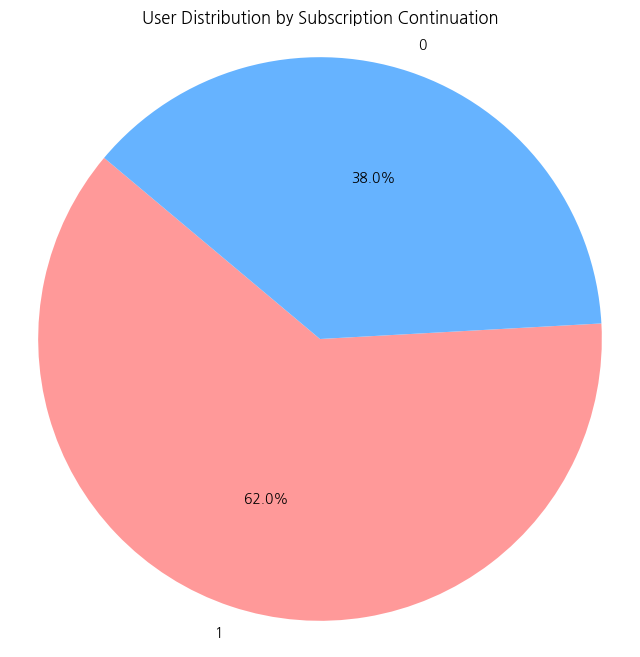

In [182]:
# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(target_user_count, labels=target_user_count.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('User Distribution by Subscription Continuation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

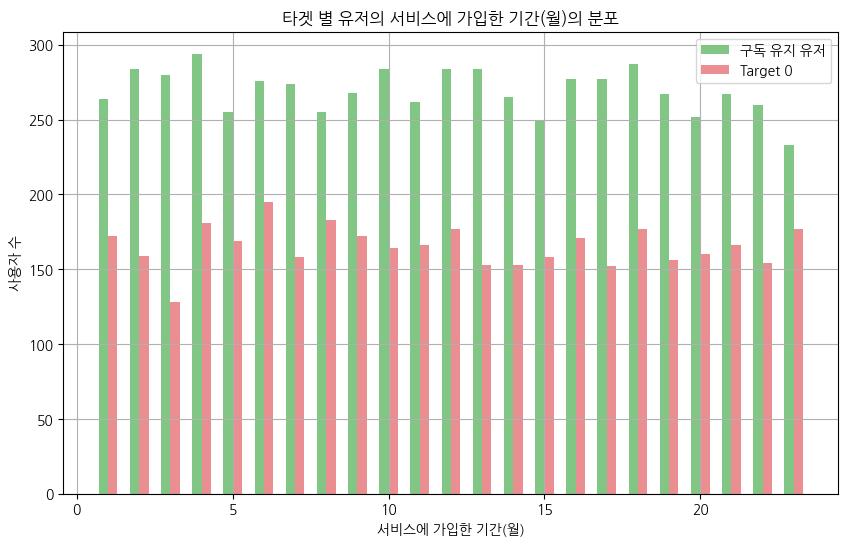

In [132]:
# target 값이 1인 행을 선택
target_1_subscription_duration = access_data[access_data['target'] == 1]

# target 값이 0인 행을 선택
target_0_subscription_duration = access_data[access_data['target'] == 0]

# '사용자가 서비스에 가입한 기간 (월)'의 분포 계산
subscription_duration_1 = target_1_subscription_duration['subscription_duration'].value_counts().sort_index()
subscription_duration_0 = target_0_subscription_duration['subscription_duration'].value_counts().sort_index()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))

# 막대 그래프 생성 (위치 조정으로 겹치지 않게 설정)
width = 0.3  # 막대의 너비
plt.bar(subscription_duration_1.index - width/2, subscription_duration_1.values, width=width, label='구독 유지 유저', color='#4CAF50', alpha=0.7)
plt.bar(subscription_duration_0.index + width/2, subscription_duration_0.values, width=width, label='Target 0', color='#e35f62', alpha=0.7)

plt.title('타겟 별 유저의 서비스에 가입한 기간(월)의 분포')
plt.xlabel('서비스에 가입한 기간(월)')
plt.ylabel('사용자 수')

plt.legend()
plt.grid(True)
plt.show()

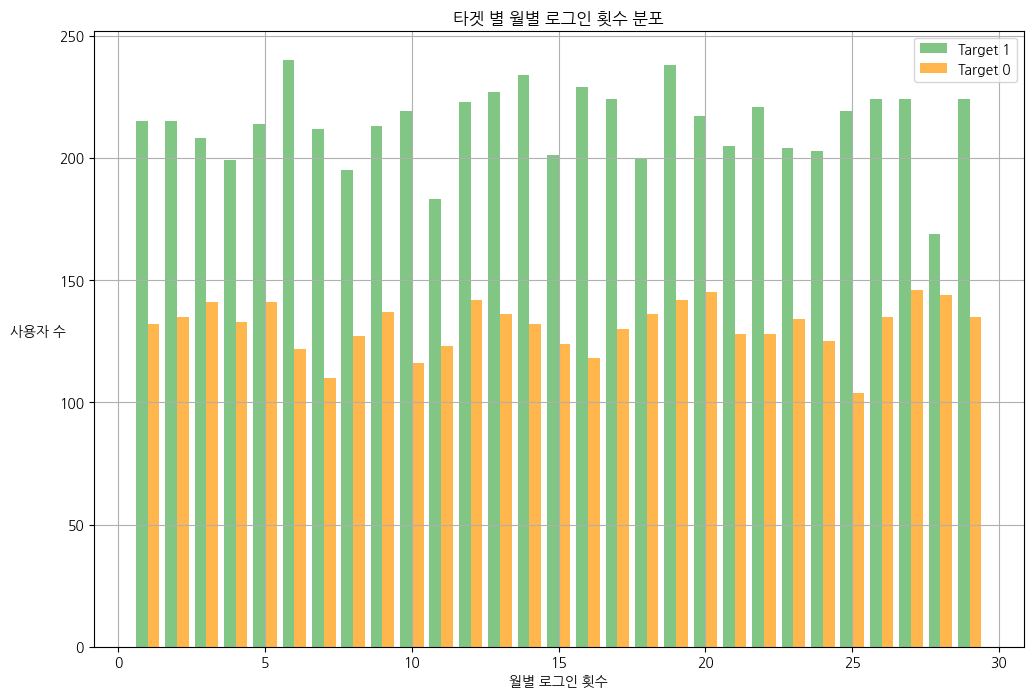

In [154]:
# target 값에 따른 월별 로그인 횟수 분포 계산
monthly_login_1 = access_data[access_data['target'] == 1]['recent_login_time'].value_counts().sort_index()
monthly_login_0 = access_data[access_data['target'] == 0]['recent_login_time'].value_counts().sort_index()

# 월별 로그인 횟수 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(monthly_login_1.index - width/2, monthly_login_1.values, width=width, label='Target 1', color='#4CAF50', alpha=0.7)
plt.bar(monthly_login_0.index + width/2, monthly_login_0.values, width=width, label='Target 0', color='#FF9800', alpha=0.7)

plt.title('타겟 별 월별 로그인 횟수 분포')
plt.xlabel('월별 로그인 횟수')
plt.ylabel('사용자 수', labelpad=15, rotation=360)
plt.legend()
plt.grid(True)
plt.show()

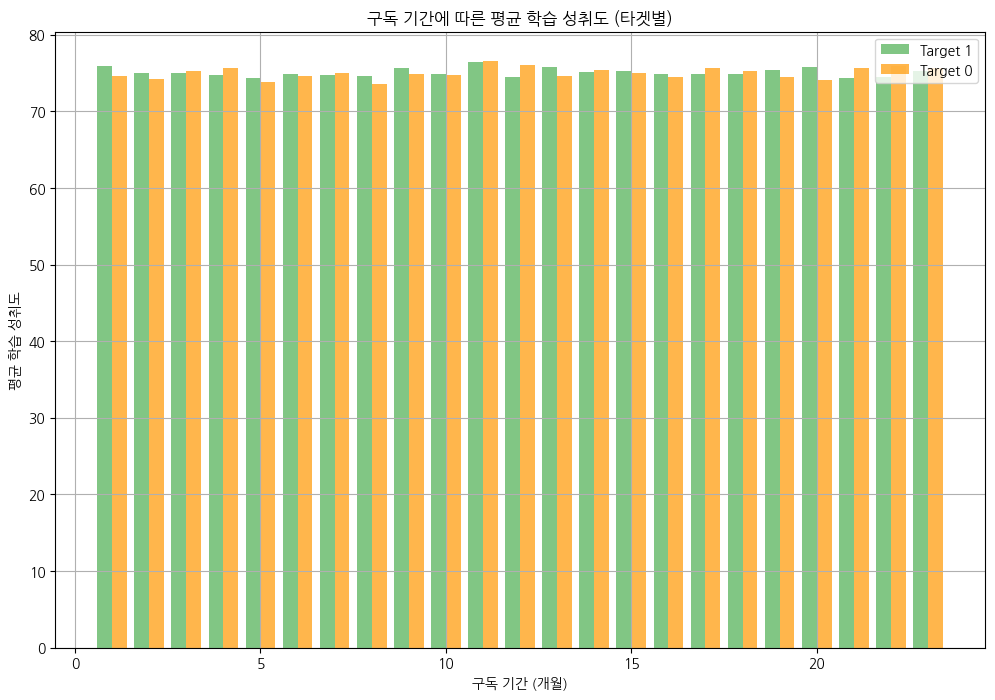

In [148]:
# target 값에 따른 구독 기간별 평균 학습 성취도 계산
avg_achievement_by_subscription_1 = access_data[access_data['target'] == 1].groupby('subscription_duration')['recent_learning_achievement'].mean()
avg_achievement_by_subscription_0 = access_data[access_data['target'] == 0].groupby('subscription_duration')['recent_learning_achievement'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(avg_achievement_by_subscription_1.index - width/2, avg_achievement_by_subscription_1.values, width=width, color='#4CAF50', alpha=0.7, label='Target 1')
plt.bar(avg_achievement_by_subscription_0.index + width/2, avg_achievement_by_subscription_0.values, width=width, color='#FF9800', alpha=0.7, label='Target 0')

plt.title('구독 기간에 따른 평균 학습 성취도 (타겟별)')
plt.xlabel('구독 기간 (개월)')
plt.ylabel('평균 학습 성취도')
plt.legend()
plt.grid(True)
plt.show()

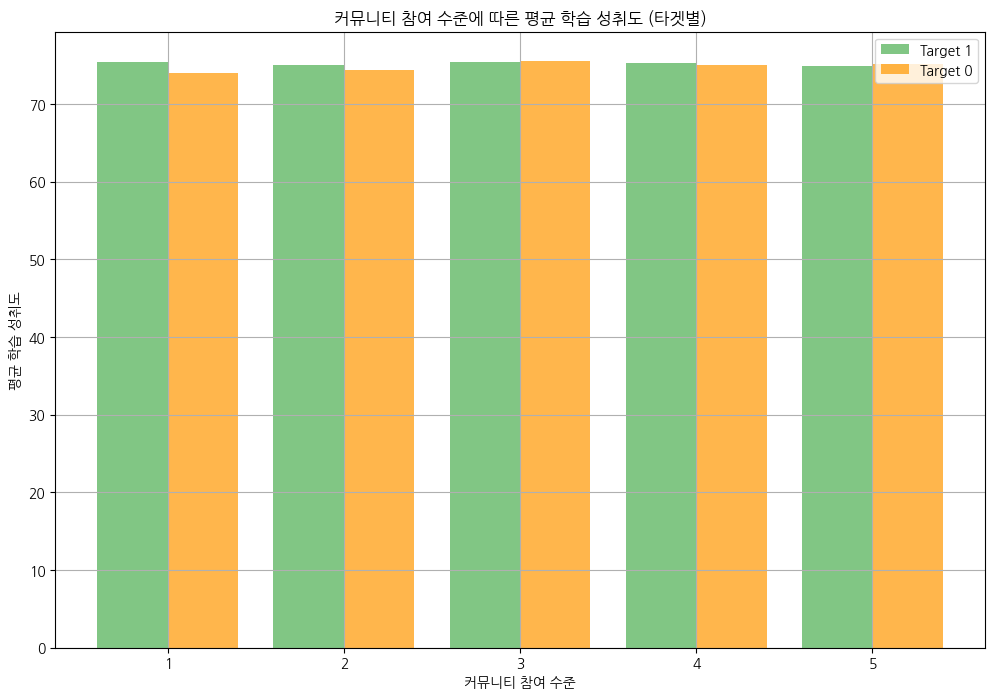

In [150]:
# target 값에 따른 커뮤니티 참여 수준별 평균 학습 성취도 계산
avg_achievement_by_engagement_1 = access_data[access_data['target'] == 1].groupby('community_engagement_level')['recent_learning_achievement'].mean()
avg_achievement_by_engagement_0 = access_data[access_data['target'] == 0].groupby('community_engagement_level')['recent_learning_achievement'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(avg_achievement_by_engagement_1.index - width/2, avg_achievement_by_engagement_1.values, width=width, color='#4CAF50', alpha=0.7, label='Target 1')
plt.bar(avg_achievement_by_engagement_0.index + width/2, avg_achievement_by_engagement_0.values, width=width, color='#FF9800', alpha=0.7, label='Target 0')

plt.title('커뮤니티 참여 수준에 따른 평균 학습 성취도 (타겟별)')
plt.xlabel('커뮤니티 참여 수준')
plt.ylabel('평균 학습 성취도')
plt.legend()
plt.grid(True)
plt.show()


### 1. 구독 기간에 따른 평균 학습 성취도 분석 (타겟별)

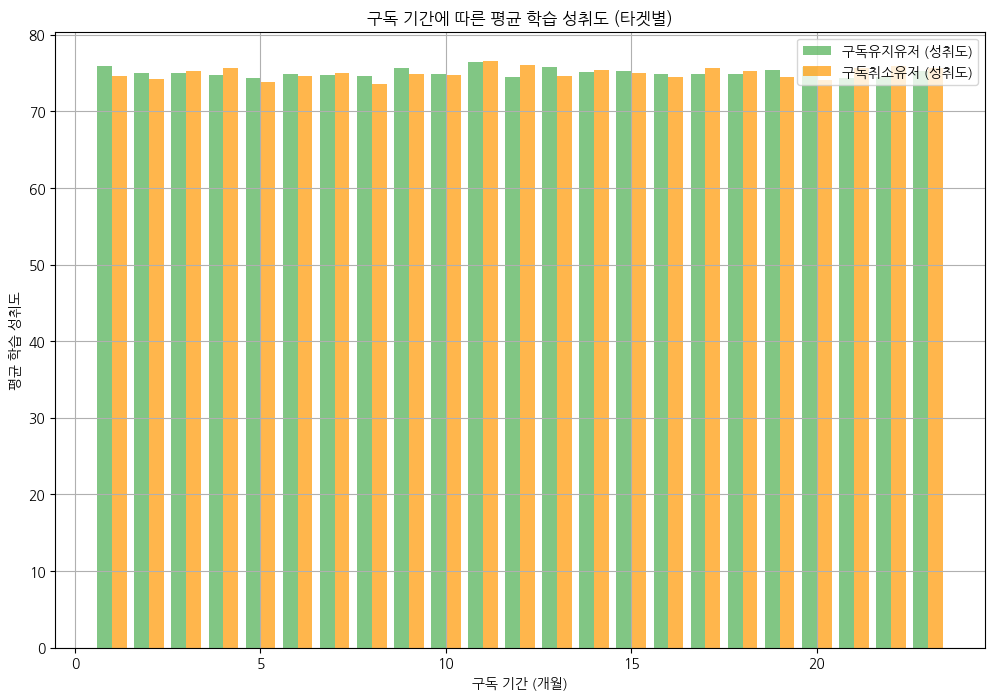

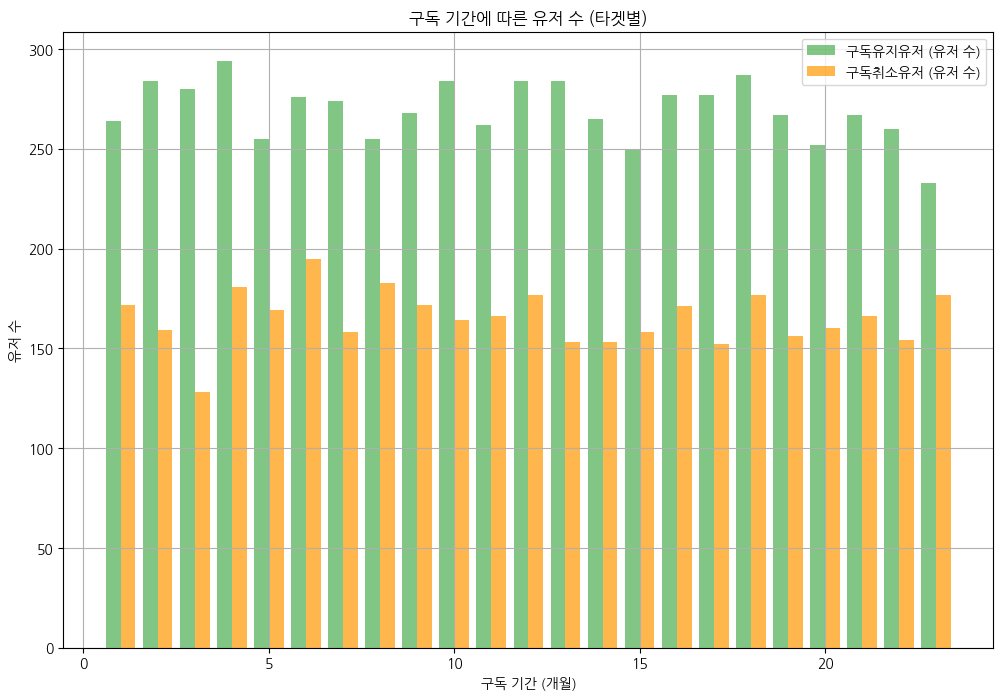

In [156]:
# target 값에 따른 구독 기간별 평균 학습 성취도 계산
avg_achievement_by_subscription_1 = access_data[access_data['target'] == 1].groupby('subscription_duration')['recent_learning_achievement'].mean()
avg_achievement_by_subscription_0 = access_data[access_data['target'] == 0].groupby('subscription_duration')['recent_learning_achievement'].mean()

# 구독 기간별 유저 수 계산
count_by_subscription_1 = access_data[access_data['target'] == 1]['subscription_duration'].value_counts().sort_index()
count_by_subscription_0 = access_data[access_data['target'] == 0]['subscription_duration'].value_counts().sort_index()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(avg_achievement_by_subscription_1.index - width/2, avg_achievement_by_subscription_1.values, width=width, color='#4CAF50', alpha=0.7, label='구독유지유저 (성취도)')
plt.bar(avg_achievement_by_subscription_0.index + width/2, avg_achievement_by_subscription_0.values, width=width, color='#FF9800', alpha=0.7, label='구독취소유저 (성취도)')

plt.title('구독 기간에 따른 평균 학습 성취도 (타겟별)')
plt.xlabel('구독 기간 (개월)')
plt.ylabel('평균 학습 성취도')
plt.legend()
plt.grid(True)
plt.show()

# 구독 기간별 유저 수 시각화
plt.figure(figsize=(12, 8))
plt.bar(count_by_subscription_1.index - width/2, count_by_subscription_1.values, width=width, color='#4CAF50', alpha=0.7, label='구독유지유저 (유저 수)')
plt.bar(count_by_subscription_0.index + width/2, count_by_subscription_0.values, width=width, color='#FF9800', alpha=0.7, label='구독취소유저 (유저 수)')

plt.title('구독 기간에 따른 유저 수 (타겟별)')
plt.xlabel('구독 기간 (개월)')
plt.ylabel('유저 수')
plt.legend()
plt.grid(True)
plt.show()

### 4. 타겟별 월별 로그인 횟수 분석

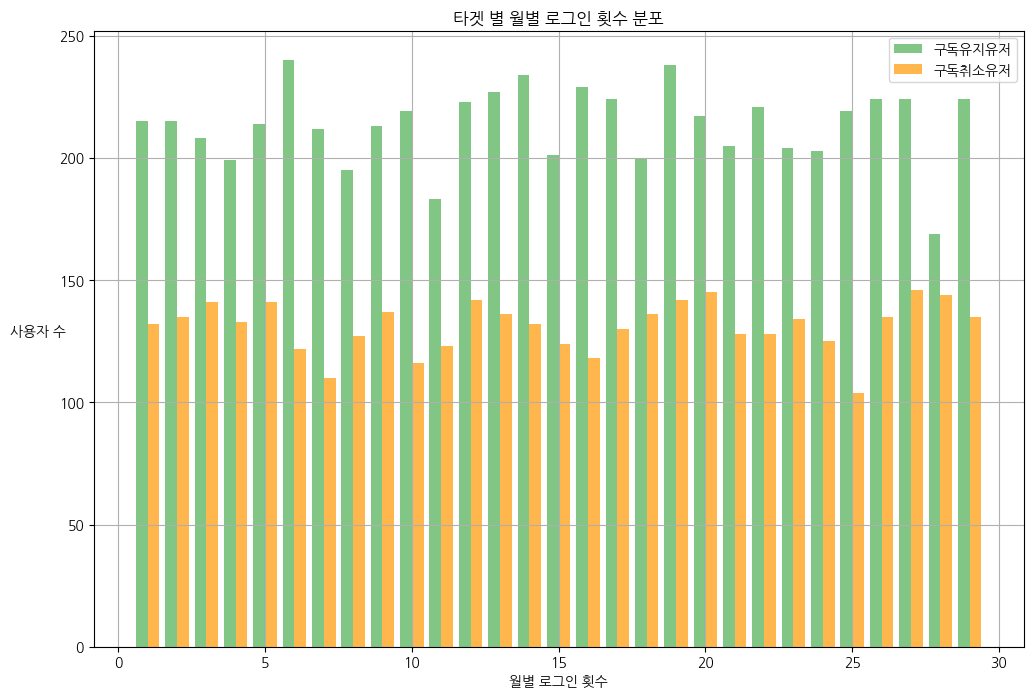

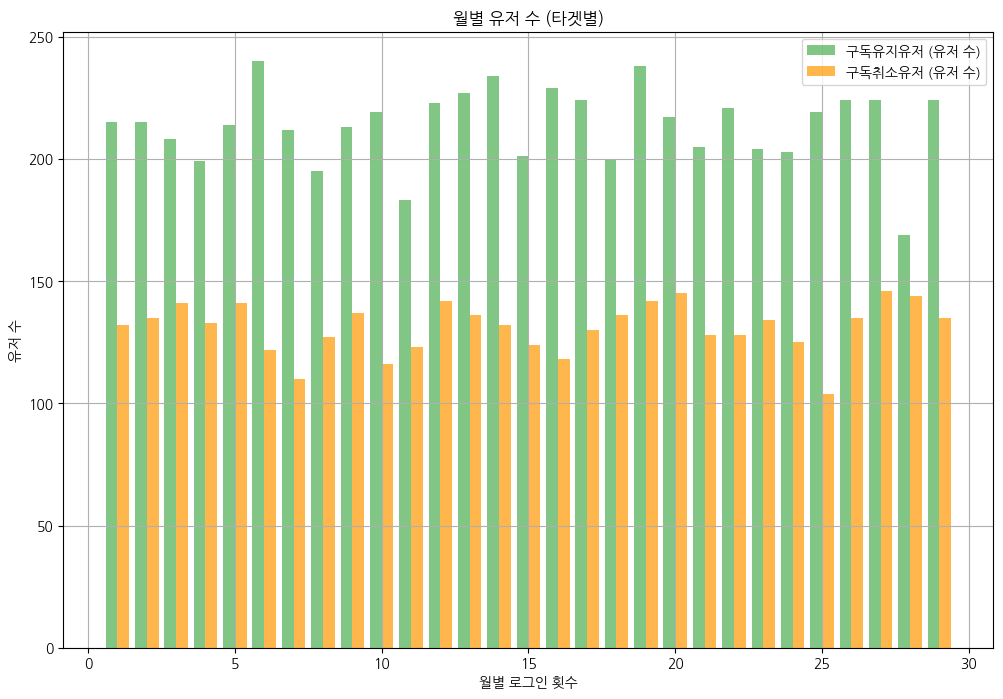

In [169]:
# target 값에 따른 월별 로그인 횟수 분포 계산
monthly_login_1 = access_data[access_data['target'] == 1]['recent_login_time'].value_counts().sort_index()
monthly_login_0 = access_data[access_data['target'] == 0]['recent_login_time'].value_counts().sort_index()

# 월별 로그인 횟수 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(monthly_login_1.index - width/2, monthly_login_1.values, width=width, label='구독유지유저', color='#4CAF50', alpha=0.7)
plt.bar(monthly_login_0.index + width/2, monthly_login_0.values, width=width, label='구독취소유저', color='#FF9800', alpha=0.7)

plt.title('타겟 별 월별 로그인 횟수 분포')
plt.xlabel('월별 로그인 횟수')
plt.ylabel('사용자 수', labelpad=15, rotation=360)
plt.legend()
plt.grid(True)
plt.show()


### 3. 커뮤니티 참여 수준에 따른 평균 학습 성취도 분석 (타겟별)

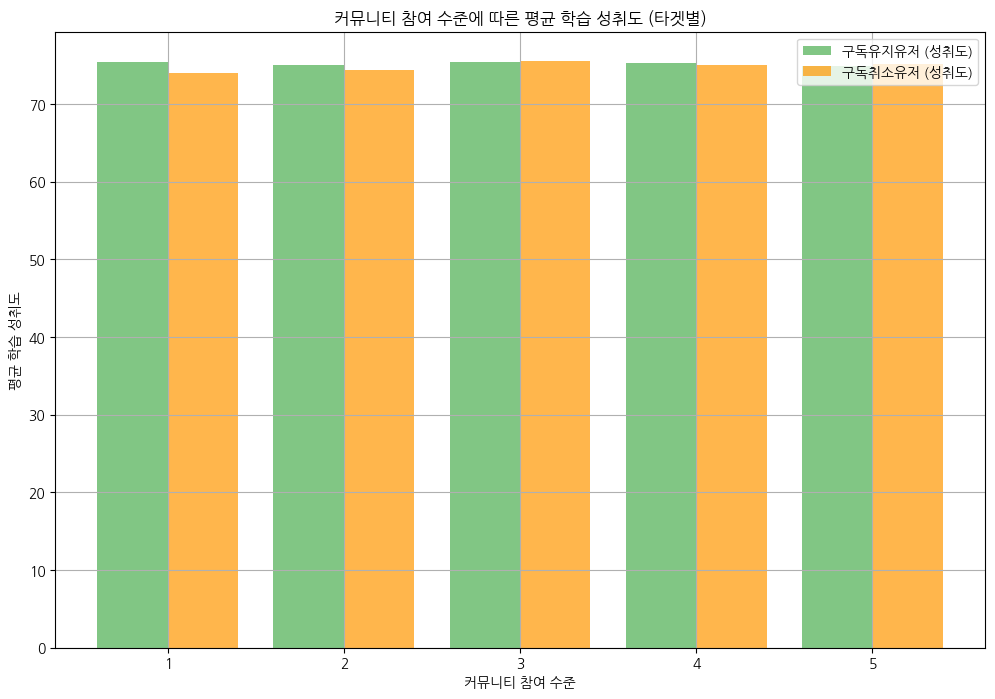

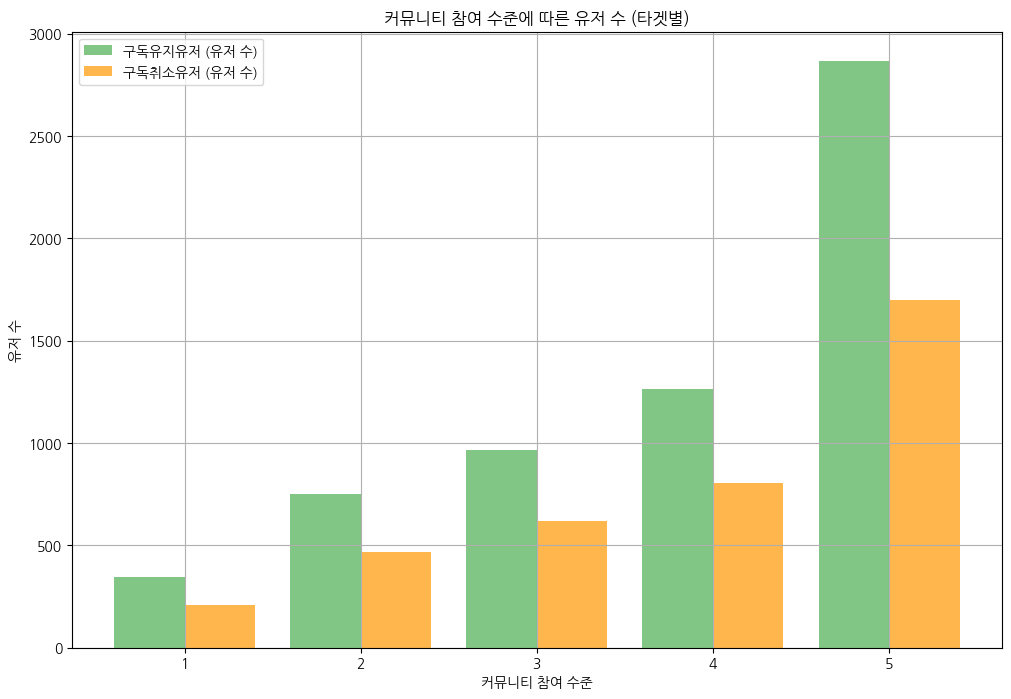

In [162]:
# 커뮤니티 참여 수준별 유저 수 계산
count_by_engagement_1 = access_data[access_data['target'] == 1]['community_engagement_level'].value_counts().sort_index()
count_by_engagement_0 = access_data[access_data['target'] == 0]['community_engagement_level'].value_counts().sort_index()

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
width = 0.4

plt.bar(avg_achievement_by_engagement_1.index - width/2, avg_achievement_by_engagement_1.values, width=width, color='#4CAF50', alpha=0.7, label='구독유지유저 (성취도)')
plt.bar(avg_achievement_by_engagement_0.index + width/2, avg_achievement_by_engagement_0.values, width=width, color='#FF9800', alpha=0.7, label='구독취소유저 (성취도)')

plt.title('커뮤니티 참여 수준에 따른 평균 학습 성취도 (타겟별)')
plt.xlabel('커뮤니티 참여 수준')
plt.ylabel('평균 학습 성취도')
plt.legend()
plt.grid(True)
plt.show()

# 커뮤니티 참여 수준별 유저 수 시각화
plt.figure(figsize=(12, 8))
plt.bar(count_by_engagement_1.index - width/2, count_by_engagement_1.values, width=width, color='#4CAF50', alpha=0.7, label='구독유지유저 (유저 수)')
plt.bar(count_by_engagement_0.index + width/2, count_by_engagement_0.values, width=width, color='#FF9800', alpha=0.7, label='구독취소유저 (유저 수)')

plt.title('커뮤니티 참여 수준에 따른 유저 수 (타겟별)')
plt.xlabel('커뮤니티 참여 수준')
plt.ylabel('유저 수')
plt.legend()
plt.grid(True)
plt.show()

### 2.4. 상관관계 분석

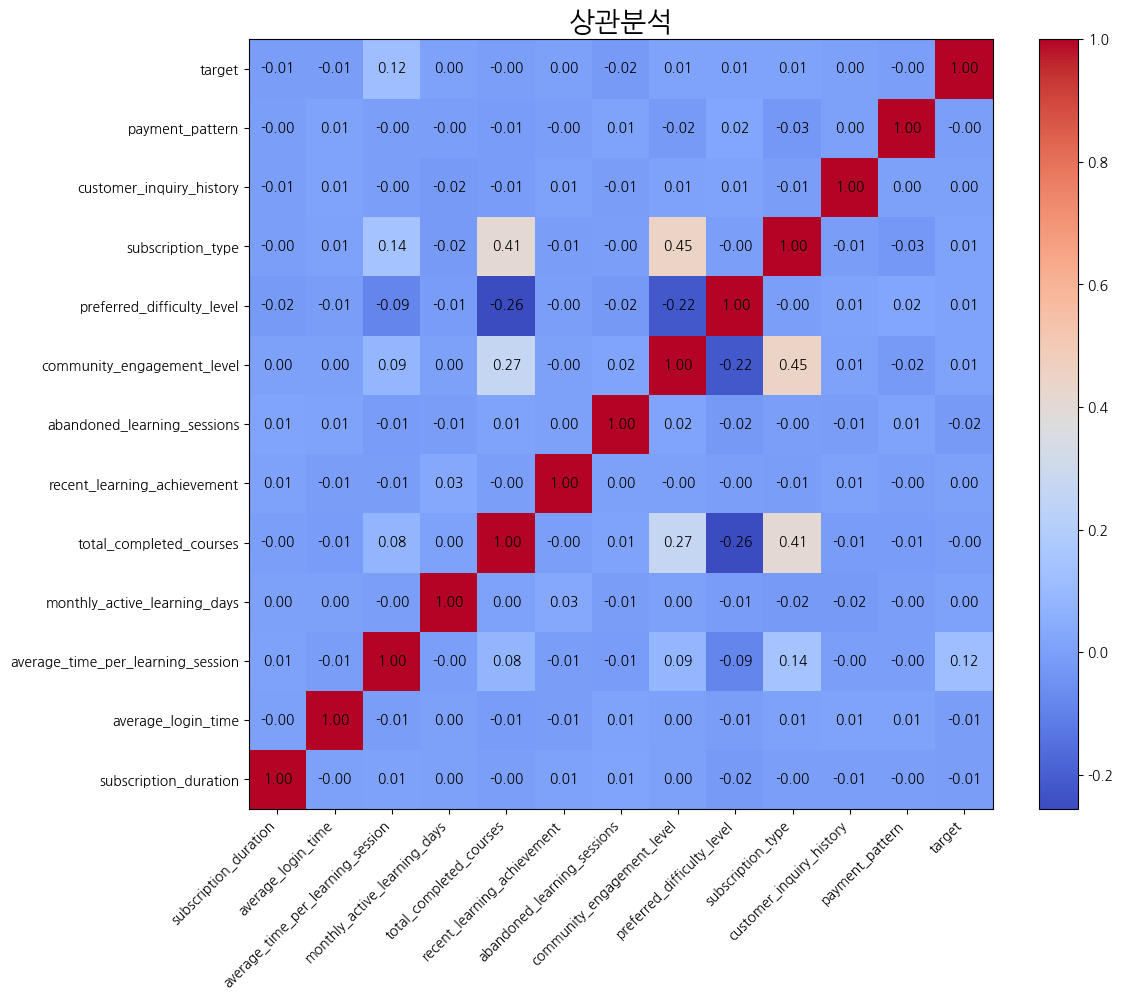

In [353]:
# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=[float, int]).drop(columns=['access_date_time_hour'], errors='ignore')

# 상관 행렬 계산
correlation_matrix = numeric_data.corr()

# matplotlib figure 설정
plt.figure(figsize=(12,10))

# 히트맵 그리기
plt.pcolor(correlation_matrix, cmap='coolwarm', linewidths=1)
plt.colorbar()

# 각 셀에 상관계수 표시
for y in range(correlation_matrix.shape[0]):
    for x in range(correlation_matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % correlation_matrix.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center')

# x축과 y축 설정
plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(0.5, len(correlation_matrix.index), 1), correlation_matrix.index)

# 제목과 라벨 설정
plt.title('상관분석', size=20)

# 그래프 표시
plt.show()


상관관계 분석하기 

monthly_active_learning_days: 월간 활동적인 학습 일수 - total_completed_courses: 완료한 총 코스 수
recent_learning_achievement: 최근 학습 성취도 - total_completed_courses: 완료한 총 코스 수
community_engagement_level: 커뮤니티 참여도 -  monthly_active_learning_days: 월간 활동적인 학습 일수

## Stpe 3. 데이터 분석하기

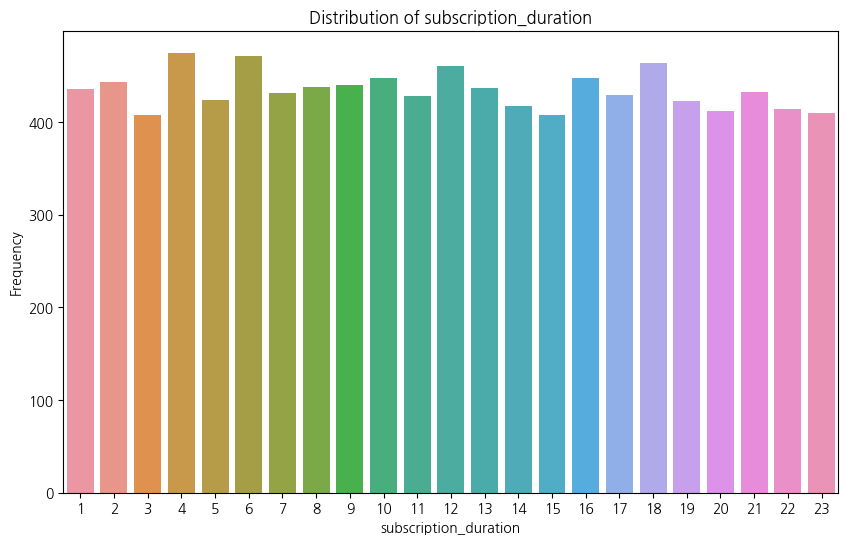

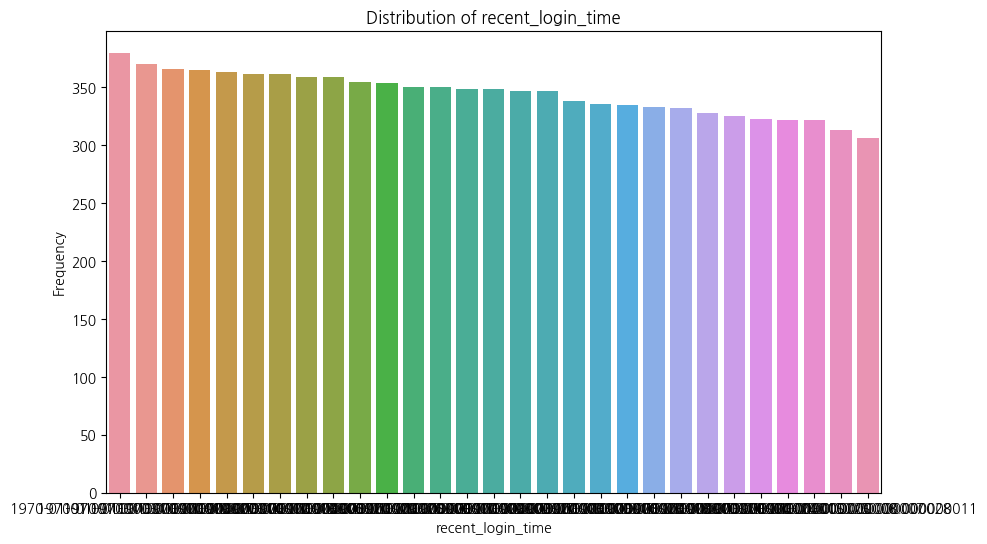

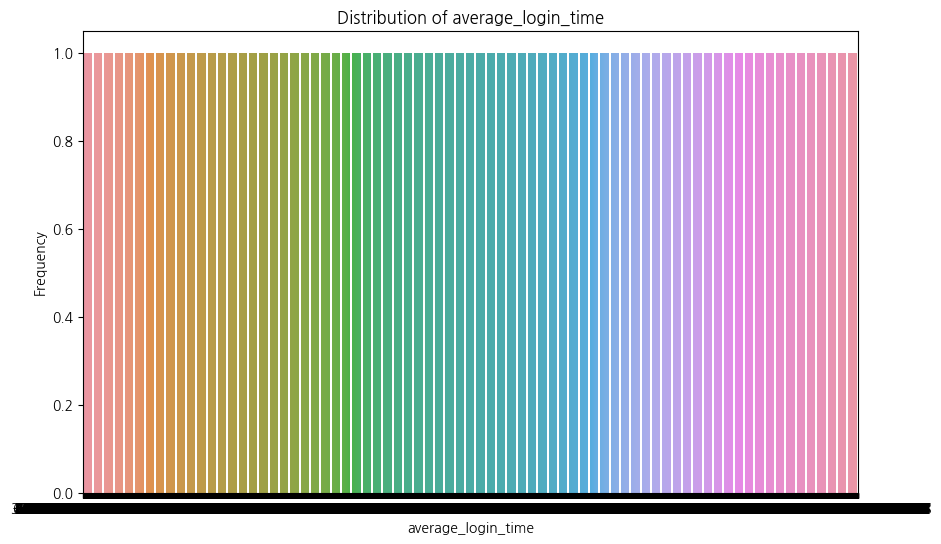

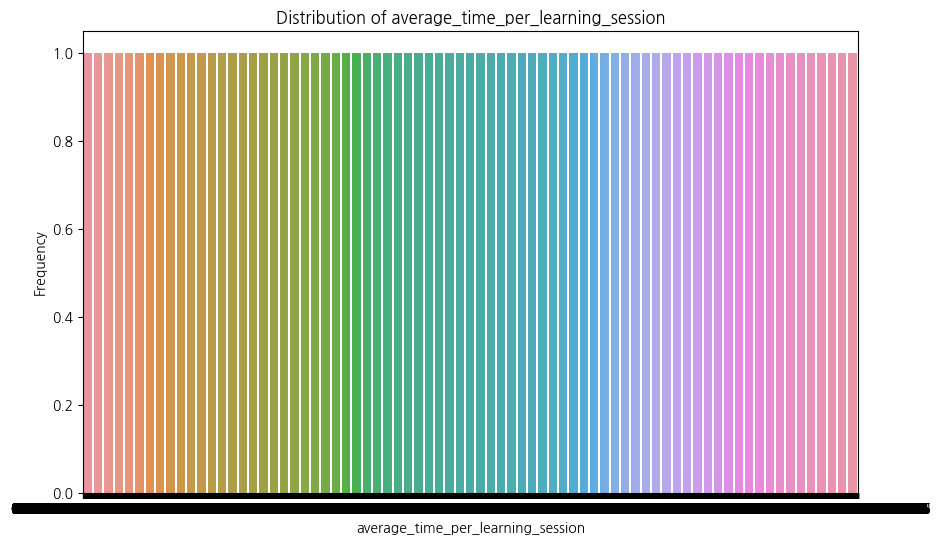

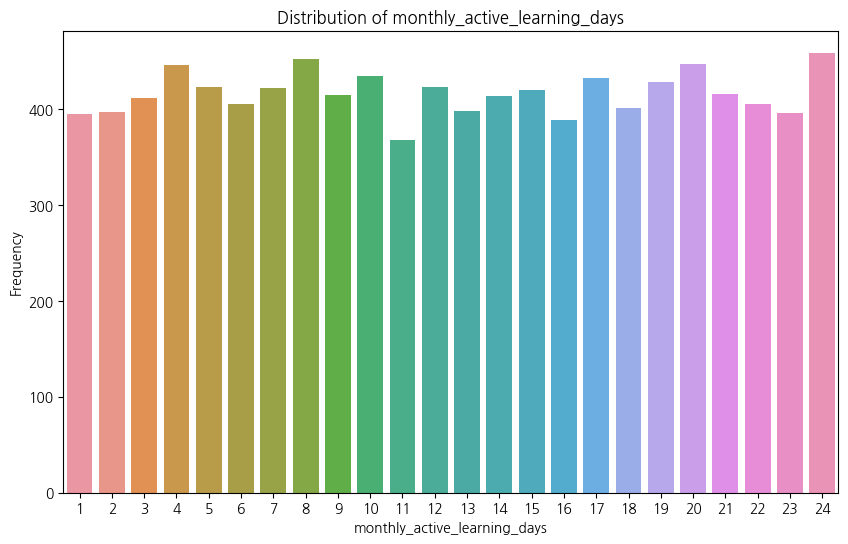

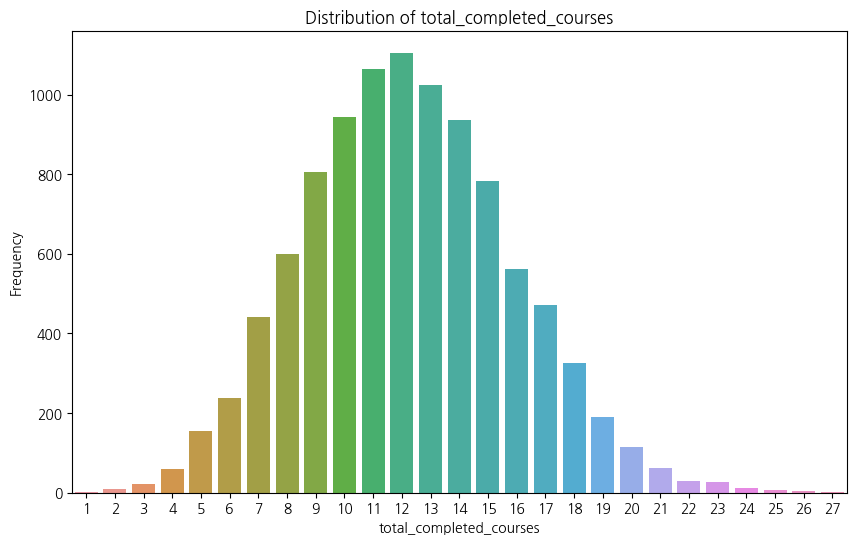

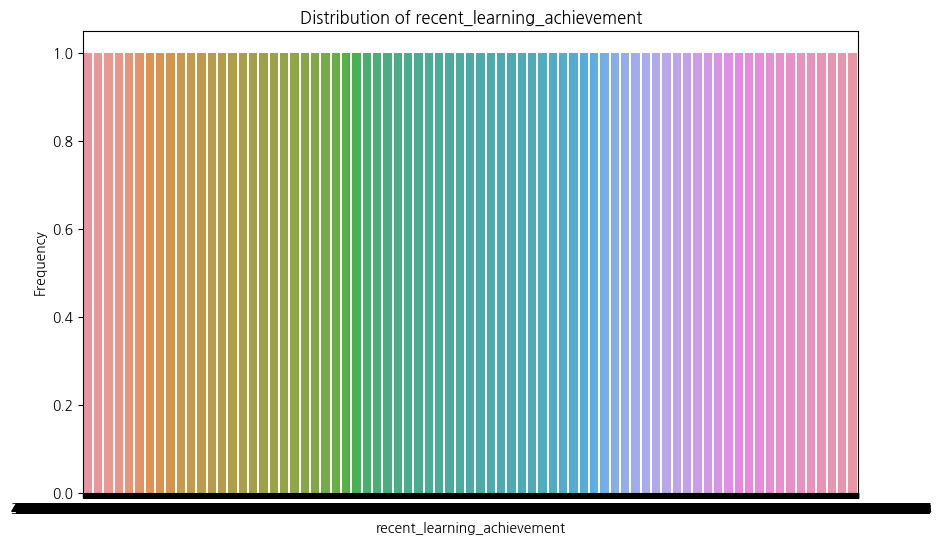

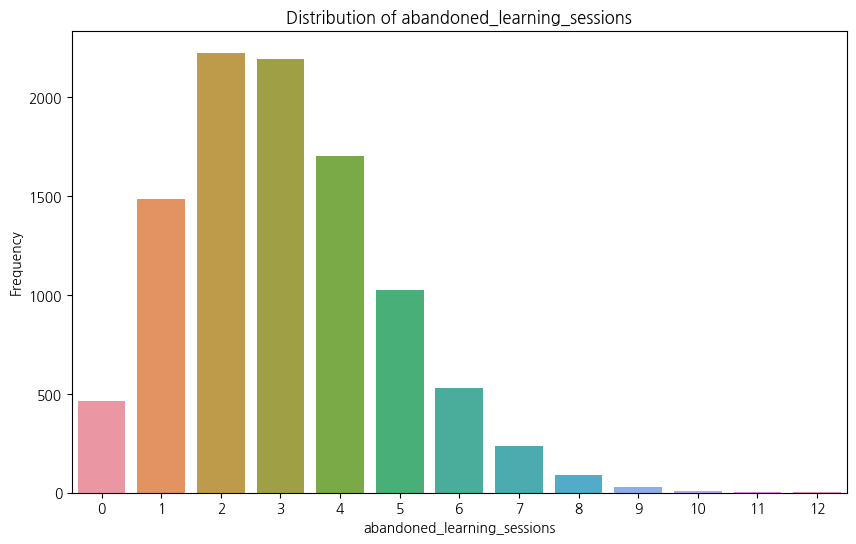

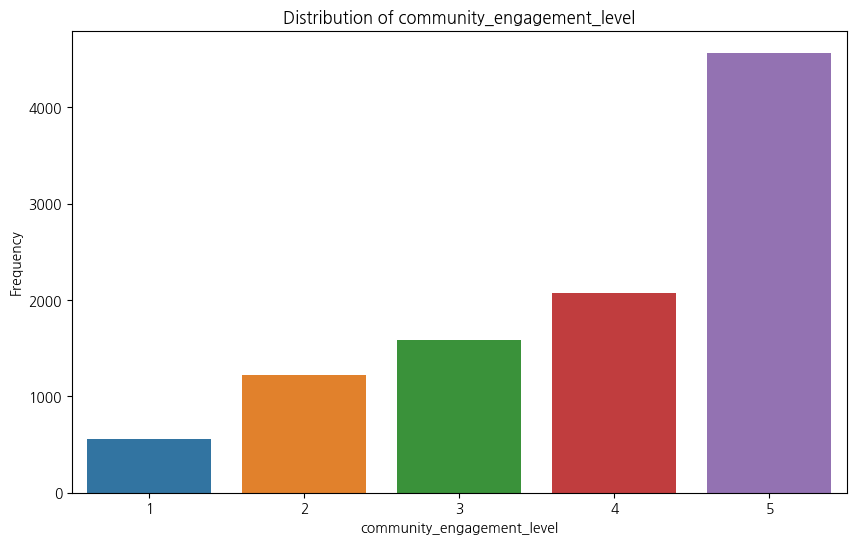

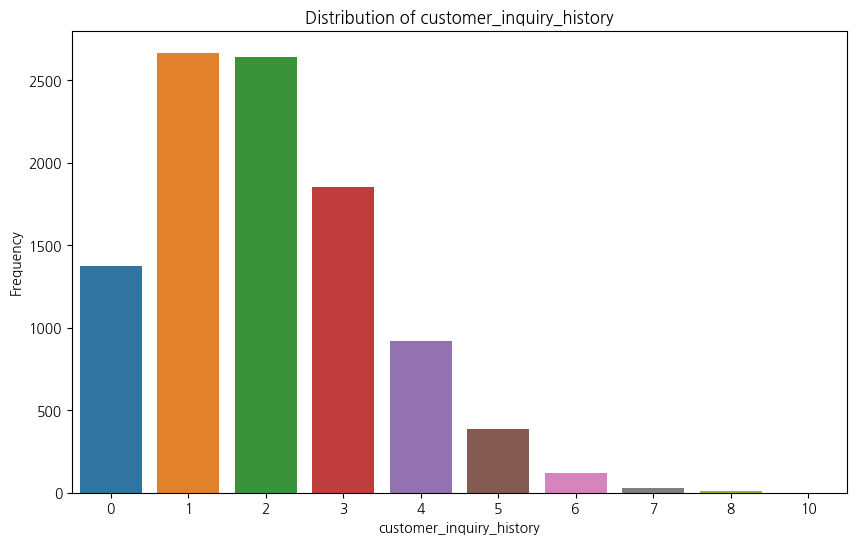

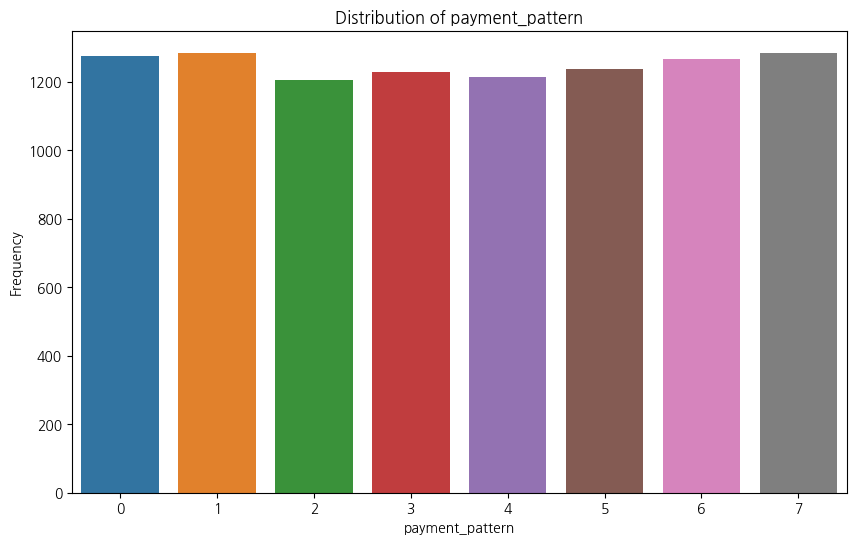

In [362]:
# 막대 그래프 시각화
variables = ['subscription_duration', 'recent_login_time', 'average_login_time', 
             'average_time_per_learning_session', 'monthly_active_learning_days', 
             'total_completed_courses', 'recent_learning_achievement', 
             'abandoned_learning_sessions', 'community_engagement_level', 
             'customer_inquiry_history', 'payment_pattern']

# 변수별 막대 그래프 생성
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data[var].value_counts().index, y=data[var].value_counts().values)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Stpe 4. 분석 결과 시각화 하기

## Stpe 5. 최종 결론 내리기

- 활동적인 학습 일수, 커뮤니티 참여도가 높은 유저는 구독을 연장할 가능성이 높다.
- 최근 학습 성취도가 높은 유저는 구독을 연장할 가능성이 높다.

- 따라서 커뮤니티 참여도에 따른 보상으로 인해 유저의 참여도를 더 높이는 방안을 마련해야 한다.